<a href="https://colab.research.google.com/github/bbutka/CEC595/blob/main/L08_HW_Pokemon_SBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai --upgrade -q

In [ ]:
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls drive/MyDrive/SBC

Bulbasaur  Charmander  Squirtle


In [ ]:
path=Path("drive/MyDrive/SBC")
path

Path('drive/MyDrive/SBC')

In [ ]:
fields = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42),
   item_tfms=RandomResizedCrop(224, min_scale=0.5),
   batch_tfms=aug_transforms())

In [ ]:
dls=fields.dataloaders(path)

In [ ]:
dls.vocab

['Bulbasaur', 'Charmander', 'Squirtle']

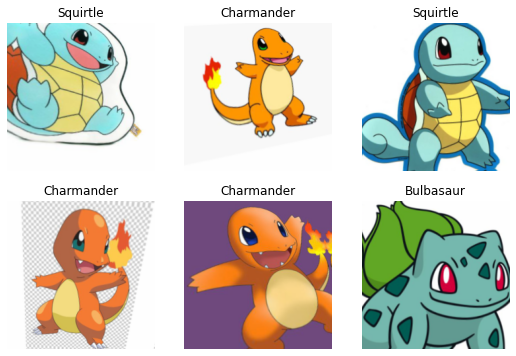

In [ ]:
dls.train.show_batch(max_n=6,nrows=2)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


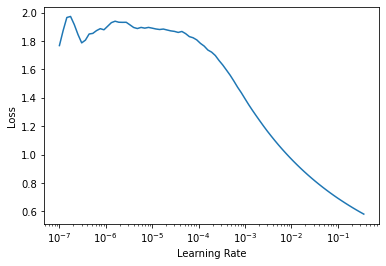

In [ ]:
lr_min,lr_steep=learn.lr_find()

In [ ]:
learn.fit_one_cycle(7,3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.701802,4.571173,0.696970,00:14
1,1.224958,2.276236,0.515152,00:01
2,0.821396,0.903011,0.242424,00:01
3,0.614598,0.397773,0.121212,00:01
4,0.489731,0.171701,0.090909,00:01
5,0.401287,0.083535,0.030303,00:01
6,0.338950,0.044125,0.000000,00:01


In [ ]:
learn.unfreeze
learn.fit_one_cycle(6,lr_max=slice(1e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.000651,0.033484,0.000000,00:01
1,0.000592,0.027148,0.000000,00:01
2,0.000729,0.027106,0.000000,00:01
3,0.010895,0.025509,0.000000,00:01
4,0.008992,0.027649,0.000000,00:01
5,0.009790,0.027939,0.000000,00:01


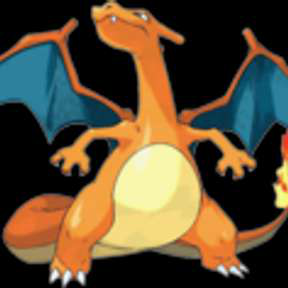

In [ ]:
img = PILImage.create('charizard-film-characters-photo-1.jfif')
img

In [ ]:
learn.predict(img)

('Charmander', tensor(1), tensor([0.0166, 0.9798, 0.0036]))

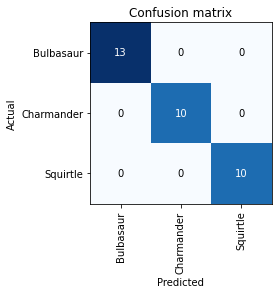

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

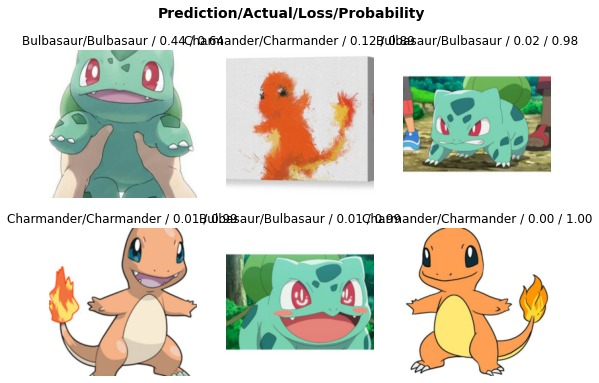

In [ ]:
interp.plot_top_losses(6,nrows=2)